In [9]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from shapely.geometry import Point
import geopandas as gpd
from geodatasets import get_path
import seaborn as sns
import plotly.figure_factory as ff
import shapely

In [2]:
import plotly.figure_factory as ff

In [3]:
df = gpd.read_file('gz_2010_us_050_00_20m/gz_2010_us_050_00_20m.shp')
def remove_first_zero(s):
    if s.startswith('0'):
        return s[1:]
    else:
        return s

df['COUNTY'] = df['COUNTY'].apply(remove_first_zero)
df

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01001,01,01,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,0500000US01009,01,09,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,0500000US01017,01,17,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,0500000US01021,01,21,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,0500000US01033,01,33,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...
3216,0500000US51001,51,01,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,0500000US51021,51,21,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,0500000US51027,51,27,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,0500000US51037,51,37,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


<Axes: >

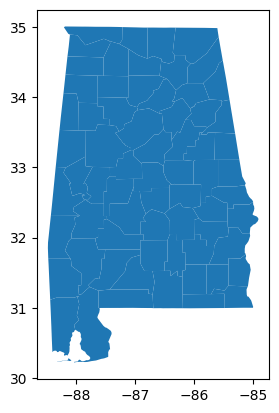

In [4]:
AL_gdf = df[df['STATE'] == '01']
AL_gdf.plot()

In [5]:
state_code = pd.read_csv('state-geocodes-v2016.csv')
state_code = state_code.rename({'Unnamed: 2':'STATE',
                               'Unnamed: 3': "Name"}, axis = 1)
state_code

,Census Bureau Region and Division Codes and Federal Information Processing System (FIPS) Codes for States,Unnamed: 1,STATE,Name
0,NaN,NaN,NaN,NaN
1,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN
2,Internet Release Date: May 2017,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Region,Division,State (FIPS),Name
...,...,...,...,...
64,4,9,02,Alaska
65,4,9,06,California
66,4,9,15,Hawaii
67,4,9,41,Oregon


In [6]:
merged_df = pd.merge(df, state_code, on = 'STATE')
merged_df = merged_df.drop(['Census Bureau Region and Division Codes and Federal Information Processing System (FIPS) Codes for States', 'Unnamed: 1'], axis = 1)

In [7]:
merged_df = merged_df.drop(['STATE'], axis = 1)

In [8]:
merged_df

,GEO_ID,COUNTY,NAME,LSAD,CENSUSAREA,geometry,Name
0,0500000US01001,01,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",Alabama
1,0500000US01009,09,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",Alabama
2,0500000US01017,17,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",Alabama
3,0500000US01021,21,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",Alabama
4,0500000US01033,33,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",Alabama
...,...,...,...,...,...,...,...
3138,0500000US44001,01,Bristol,County,24.164,"POLYGON ((-71.22480 41.71050, -71.22787 41.705...",Rhode Island
3139,0500000US44003,03,Kent,County,168.528,"POLYGON ((-71.78968 41.72457, -71.45534 41.732...",Rhode Island
3140,0500000US44005,05,Newport,County,102.386,"MULTIPOLYGON (((-71.38359 41.46478, -71.38928 ...",Rhode Island
3141,0500000US44007,07,Providence,County,409.502,"POLYGON ((-71.79682 41.92855, -71.79924 42.008...",Rhode Island


In [55]:
states = pd.read_csv('data/gdf_clean.csv')


In [56]:
states.dtypes

State       object
Name        object
State_id     int64
geometry    object
dtype: object

In [59]:
states.drop(['geometry'], axis = 1, inplace = True)
merged = pd.merge(merged_df, states, on = 'Name')
merged.drop(['COUNTY'], axis = 1, inplace = True)
merged = merged.rename({'NAME': 'Countyname',
                       'CENSUSAREA': 'Censusarea'
                       }, axis = 1)

In [60]:
merged = merged.rename({'GEOID': "State_id"}, axis = 1)
merged.head(2)

,GEO_ID,Countyname,LSAD,Censusarea,geometry,Name,State,State_id
0,0500000US01001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",Alabama,AL,1
1,0500000US01009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",Alabama,AL,1


In [61]:
merged.to_file('counties/county_us.shp', index = False)

In [62]:
merged.dtypes

GEO_ID          object
Countyname      object
LSAD            object
Censusarea     float64
geometry      geometry
Name            object
State           object
State_id         int64
dtype: object

In [10]:
df = gpd.read_file('asbpa_info/asbpa_info.shp')
gpd = gpd.read_file('counties/county_us.shp')

In [11]:
df.head(2)

,GEO_ID,Countyname,LSAD,Censusarea,Name,State,Beachloc,Latitude,Longitude,Year,Length_ft,Volume_cy,ssname,ssloc,sstype,geometry
0,0500000US02122,Kenai Peninsula,Borough,16075.331,Alaska,AK,Ninilchik,60.018889,-151.587500,2010,NaN,12296.0,None,None,Nearshore,POINT (-151.58750 60.01889)
1,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2010,NaN,25965.0,None,None,Nearshore,POINT (-165.43139 64.49778)


In [12]:
gpd.head(2)

,GEO_ID,Countyname,LSAD,Censusarea,Name,State,State_id,geometry
0,0500000US01001,Autauga,County,594.436,Alabama,AL,1,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,0500000US01009,Blount,County,644.776,Alabama,AL,1,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."


In [13]:
merge = pd.merge(df, gpd, on = 'GEO_ID')


In [14]:
merge.head(10)

,GEO_ID,Countyname_x,LSAD_x,Censusarea_x,Name_x,State_x,Beachloc,Latitude,Longitude,Year,...,ssloc,sstype,geometry_x,Countyname_y,LSAD_y,Censusarea_y,Name_y,State_y,State_id,geometry_y
0,0500000US02122,Kenai Peninsula,Borough,16075.331,Alaska,AK,Ninilchik,60.018889,-151.587500,2010,...,None,Nearshore,POINT (-151.58750 60.01889),Kenai Peninsula,Borough,16075.331,Alaska,AK,2,"MULTIPOLYGON (((-148.74558 60.73388, -148.6554..."
1,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2010,...,None,Nearshore,POINT (-165.43139 64.49778),Nome,CA,22961.761,Alaska,AK,2,"MULTIPOLYGON (((-169.26760 63.34400, -169.1019..."
2,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2011,...,None,Nearshore,POINT (-165.43139 64.49778),Nome,CA,22961.761,Alaska,AK,2,"MULTIPOLYGON (((-169.26760 63.34400, -169.1019..."
3,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2013,...,None,Nearshore,POINT (-165.43139 64.49778),Nome,CA,22961.761,Alaska,AK,2,"MULTIPOLYGON (((-169.26760 63.34400, -169.1019..."
4,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2014,...,None,Nearshore,POINT (-165.43139 64.49778),Nome,CA,22961.761,Alaska,AK,2,"MULTIPOLYGON (((-169.26760 63.34400, -169.1019..."
5,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2015,...,None,Nearshore,POINT (-165.43139 64.49778),Nome,CA,22961.761,Alaska,AK,2,"MULTIPOLYGON (((-169.26760 63.34400, -169.1019..."
6,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2016,...,None,Nearshore,POINT (-165.43139 64.49778),Nome,CA,22961.761,Alaska,AK,2,"MULTIPOLYGON (((-169.26760 63.34400, -169.1019..."
7,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2017,...,None,Nearshore,POINT (-165.43139 64.49778),Nome,CA,22961.761,Alaska,AK,2,"MULTIPOLYGON (((-169.26760 63.34400, -169.1019..."
8,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2018,...,Inlet,Nearshore,POINT (-165.43139 64.49778),Nome,CA,22961.761,Alaska,AK,2,"MULTIPOLYGON (((-169.26760 63.34400, -169.1019..."
9,0500000US02180,Nome,CA,22961.761,Alaska,AK,Nome Harbor,64.497778,-165.431389,2019,...,Inlet,Nearshore,POINT (-165.43139 64.49778),Nome,CA,22961.761,Alaska,AK,2,"MULTIPOLYGON (((-169.26760 63.34400, -169.1019..."
